# Correlation between SAT Scores and Demographics 

# Read in the Data

In [153]:
#Read in all the files as separate dataframes within a larger dictionary called data.
import pandas as pd 
filenames=['AP_Results_2010.csv','Class_Size.csv','Demographics.csv','Graduation_Outcomes.csv','High_School_Directory.csv','SAT_Results.csv']

data={}
for f in filenames:
    d=pd.read_csv('C:\Users\pminh\Documents\Python Scripts\Schools\{0}'.format(f))
    key_name=f.replace(".csv", "")
    data[key_name]=d

for d in data:
    print(data[d].head())



      dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max  \
0               NaN       

In [154]:
#The survey data has a different encoding format than the .csv files above so I read them in separately and 
#then concated the survey data from district 75 and all other districts into one large dataframe. 
all_survey=pd.read_csv('C:\Users\pminh\Documents\Python Scripts\Schools\survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey=pd.read_csv('C:\Users\pminh\Documents\Python Scripts\Schools\survey_d75.txt', delimiter='\t', encoding='windows-1252')
survey=pd.concat([all_survey,d75_survey],axis=0)
print(survey.head())

     N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       7.6       NaN   ...       29.0     67.0      5.0     0.0   NaN   
1       7.6       NaN   ...       74.0     21.0      6.0     0.0   NaN   
2       8.3       NaN   ...       33.0     35.0     20.0    13.0   NaN   
3       8.2       5.9   ...       21.0     45.0     28.0     7.0   NaN   
4       7.9       NaN   ...       59.0     36.0      5.0     0.0   NaN   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0     5.0    14.0    52.0    24.0     5.0  
1     3.0     6.0     3.0   

# Clean the Individual Datframes 

In [155]:
#Notice that all dataframes have a DBN column. This column can be used to merge the separate dataframes
#into one large dataframe. In order to merge all the fields together the column name must have the same case. 
#Since all other dataframes above have a capital "dbn" the dbn column in the survey data is changed to "DBN". The 
#survey data is then added to the "data" dictionary. The same is done for the "High_School_Directory" dataframe. 
survey['DBN']=survey['dbn']
survey_fields=['DBN','rr_s','rr_t','rr_p','N_s','N_t','N_p','saf_p_11','com_p_11','eng_p_11','aca_p_11','saf_t_11','com_t_11','eng_t_11','aca_t_11','saf_s_11','com_s_11','eng_s_11','aca_s_11','saf_tot_11','com_tot_11','eng_tot_11','aca_tot_11']
survey=survey.loc[:,survey_fields]

data['survey']=survey

data['High_School_Directory']['DBN']=data['High_School_Directory']['dbn']

In [156]:
# The "Class_Size" dataframe does not have a DBN column. If you inspect carefully, you notice that the DBN column
#is the merge of the "CSD" number and the school code. The function below pads the csd number with a zero. 
def pad_csd(num):
    string=str(num)
    if len(string)> 1:
        return string
    else:
        return string.zfill(2)
    
data['Class_Size']['padded_csd']=data['Class_Size']['CSD'].apply(pad_csd)
data['Class_Size']['DBN']=data['Class_Size']['padded_csd']+data['Class_Size']['SCHOOL CODE']
print(data['Class_Size'].head())
        
        

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


In [157]:
#Insepct Class_Size dataframe to see how it can be cleaned up. 
Class_Size=data["Class_Size"]
print(Class_Size.columns)
print(Class_Size['GRADE '].unique()) #returns all the unique values within a column 
print(Class_Size['PROGRAM TYPE'].unique())



Index([u'CSD', u'BOROUGH', u'SCHOOL CODE', u'SCHOOL NAME', u'GRADE ',
       u'PROGRAM TYPE', u'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       u'CORE COURSE (MS CORE and 9-12 ONLY)', u'SERVICE CATEGORY(K-9* ONLY)',
       u'NUMBER OF STUDENTS / SEATS FILLED', u'NUMBER OF SECTIONS',
       u'AVERAGE CLASS SIZE', u'SIZE OF SMALLEST CLASS',
       u'SIZE OF LARGEST CLASS', u'DATA SOURCE',
       u'SCHOOLWIDE PUPIL-TEACHER RATIO', u'padded_csd', u'DBN'],
      dtype='object')
['0K' '01' '02' '03' '04' '05' '0K-09' nan '06' '07' '08' 'MS Core' '09-12'
 '09']
['GEN ED' 'CTT' 'SPEC ED' nan 'G&T']


In [158]:
#Since we are interested in the correlation between SAT scores and demographics we are only concerned with grades 
#9-12 in General Education.  
Class_Size=Class_Size[Class_Size["GRADE "] =="09-12"] 
Class_Size=Class_Size[Class_Size["PROGRAM TYPE"]=="GEN ED"]
print(Class_Size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

In [159]:
#The DBN column is still not unique. The class size is listed for each core course for each DBN number. 
#In order to make the DBN unique, we can group the data by the DBN and then take the average of the average 
#class size. 

import numpy as np 

Class_Size=data['Class_Size']
Class_Size=Class_Size.groupby('DBN').agg(np.mean)

#When using the groupby and aggregate method, the index will become the column the grouping 
#was done on (in this case DBN), and it will no longer be a column. In order to move DBN back to a column, 
#we'll need to use reset_index. This will reset the index to a list of integers, 
#and make DBN a column again. 

Class_Size.reset_index(inplace=True)
data['Class_Size']=Class_Size 
print(data['Class_Size'].head())
   
    

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M015    1                          17.727273            1.090909   
1  01M019    1                          24.250000            1.333333   
2  01M020    1                          43.923077            2.076923   
3  01M034    1                          38.038462            1.692308   
4  01M063    1                          16.400000            1.000000   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           16.545455               16.454545              16.636364   
1           17.625000               17.333333              17.916667   
2           21.976923               21.307692              22.538462   
3           21.461538               20.730769              22.038462   
4           16.400000               16.400000              16.400000   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             8.4  
1                            10.0  
2                   

In [160]:
#The SAT_Results show
#The math, reading, and writing sat scores can be combined into a single column called sat_score. 
#The individual scores first need to be converted to the numeric type so that they can be added. 
math=pd.to_numeric(data['SAT_Results']['SAT Math Avg. Score'],errors = 'coerce')
critical_reading=pd.to_numeric(data['SAT_Results']['SAT Critical Reading Avg. Score'], errors = 'coerce')
writing=pd.to_numeric(data['SAT_Results']['SAT Writing Avg. Score'], errors='coerce')

data['SAT_Results']['sat_score']=math+critical_reading+writing

In [161]:
#The location data available can also be useful to map out the schools and see if sat_scores are area dependant.
#extract_lat extracts the latitude from the string in the "Location1" column and the extract_longi extracts the 
#longitude from the same string in the "Location1" column. 

import re 
def extract_lat(string):
    long_lat=re.findall('\(.+,.+\)', string) #directs to the location of the string that will need parsing. 
    lat=long_lat[0].split(',')[0].replace('(', '')  
    return lat 
def extract_longi(string):
    longi_lat=re.findall('\(.+,.+\)', string) 
    longi=longi_lat[0].split(',')[1].replace(')','')
    return longi 

data['High_School_Directory']['lat']=data['High_School_Directory']['Location 1'].apply(extract_lat)
data['High_School_Directory']['longi']=data['High_School_Directory']['Location 1'].apply(extract_longi)

data["High_School_Directory"]["longi"]=pd.to_numeric(data["High_School_Directory"]["longi"], errors="coerce") 
data["High_School_Directory"]["lat"]=pd.to_numeric(data["High_School_Directory"]["lat"], errors="coerce") 

print(data['High_School_Directory'].head())



      dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max    ...      \
0              

In [162]:
#Next we will condense the demographics dataframe. 
print(data['Demographics'].head())

      DBN                       Name  schoolyear fl_percent  frl_percent  \
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006       89.4          NaN   
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007       89.4          NaN   
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008       89.4          NaN   
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009       89.4          NaN   
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010                    96.5   

   total_enrollment prek   k grade1 grade2    ...     black_num black_per  \
0               281   15  36     40     33    ...            74      26.3   
1               243   15  29     39     38    ...            68      28.0   
2               261   18  43     39     36    ...            77      29.5   
3               252   17  37     44     32    ...            75      29.8   
4               208   16  40     28     32    ...            67      32.2   

  hispanic_num hispanic_per white_num white_per male_num male_per female_num  \


In [163]:
print(data['Demographics']['schoolyear'].dtype)
print(data['Demographics']['schoolyear'].unique())

int64
[20052006 20062007 20072008 20082009 20092010 20102011 20112012]


In [164]:
#Select the year that corresponds to the year the SAT_Results data comes from 
data['Demographics']=data['Demographics'][data['Demographics']['schoolyear']==20112012]
print(data['Demographics'].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  \
6         NaN         89.4               189   13   31     35     28   
13        NaN         61.5               328   32   46     52     54   
20        NaN         92.5               626   52  102    121     87   
27        NaN         99.7               401   14   34     38     36   
35        NaN         78.9               176   18   20     30     21   

      ...     black_num black_per hispanic_num hispanic_per white_num  \
6     ...            63      33.3    

In [165]:
print(data['Graduation_Outcomes'].head())

    Demographic     DBN                            School Name    Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2005   
3  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2006   
4  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL  2006 Aug   

   Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
0             5               s                         s                 s   
1            55              37                     67.3%                17   
2            64              43                     67.2%                27   
3            78              43                     55.1%                36   
4            78              44                     56.4%                37   

  Total Regents - % of cohort Total Regents - % of grads  \
0       

In [166]:
#Condense Graduation Outcomes data
print(data['Graduation_Outcomes']['Demographic'].unique())
print(data['Graduation_Outcomes']['Cohort'].unique())

['Total Cohort' 'Male' 'English Language Learners'
 'English Proficient Students' 'Special Education Students'
 'General Education Students' 'Asian' 'Black' 'Hispanic' 'White' 'Female']
['2003' '2004' '2005' '2006' '2006 Aug' '2001' '2002']


In [167]:
#Choose the most recent data possible 
data['Graduation_Outcomes']=data['Graduation_Outcomes'][data['Graduation_Outcomes']['Cohort']=='2006']
data['Graduation_Outcomes']=data['Graduation_Outcomes'][data['Graduation_Outcomes']['Demographic']=='Total Cohort']
print(data['Graduation_Outcomes'].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   
31           193             105                     54.4%                91   

   Total Regents - % of cohort Total Regents - % of grads  \
3            

In [168]:
#Condense AP data
print(data['AP_Results_2010'].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  


In [169]:
#Determine the type for the values in each column 
col=data['AP_Results_2010'].columns
col_type={}
for c in col:
    typ=data['AP_Results_2010'][c].dtype
    col_type[c]=typ

print(col_type)

{'AP Test Takers ': dtype('O'), 'SchoolName': dtype('O'), 'Number of Exams with scores 3 4 or 5': dtype('O'), 'Total Exams Taken': dtype('O'), 'DBN': dtype('O')}


In [170]:
#Convert AP Test Takers, Total Exams Taken, Number of exams with scores 3 4 or 5 to numeric type 
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for c in cols:
    data["AP_Results_2010"][c]=pd.to_numeric(data["AP_Results_2010"][c], errors="coerce") 
    
print(data["AP_Results_2010"].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  


# Merge the cleaned dataframes 

In [171]:
#Next step is to merge the data 
combined=data['SAT_Results']
combined = combined.merge(data["AP_Results_2010"], on="DBN", how="left")
combined = combined.merge(data["Graduation_Outcomes"], on="DBN", how="left")
print(combined.head(5))
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  sat_score                    SchoolName  \
0                    363     1122.0                           NaN   
1                   

In [172]:
combined=combined.merge(data["Class_Size"], on="DBN", how="inner") 
combined=combined.merge(data["Demographics"], on="DBN", how="inner") 
combined=combined.merge(data["survey"], on="DBN", how="inner")
combined=combined.merge(data["High_School_Directory"], on="DBN", how="inner")
print(combined.head())
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                     44                             390                 433   
4                    159                             522                 574   

  SAT Writing Avg. Score  sat_score                      SchoolName  \
0                    363     1122.0                            

# Get rid of NaN values in the combined dataframe 

In [173]:
#Fill all the NaN values in the combined dataframe with the mean of the column.
#Replace any remaining NaN values with a 0. 

means=combined.mean()
combined=combined.fillna(means) 
combined=combined.fillna(0) 
print(combined.head())

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                     44                             390                 433   
4                    159                             522                 574   

  SAT Writing Avg. Score  sat_score                      SchoolName  \
0                    363     1122.0                            

In [174]:
#Add a school district column so that there is a possibility to group data by district 
def extract(string):
    name = string 
    return name[0:2]

combined["school_dist"]=combined["DBN"].apply(extract) 

print(combined["school_dist"].head()) 

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


# Find Correlations 

In [175]:
#Calculate the correlation between each column in the combined dataframe and the sat_score column.  
correlations=combined.corr()
correlations=correlations['sat_score']
print(correlations)

sat_score                               1.000000
AP Test Takers                          0.516145
Total Exams Taken                       0.507801
Number of Exams with scores 3 4 or 5    0.460134
Total Cohort                            0.318515
CSD                                     0.031551
NUMBER OF STUDENTS / SEATS FILLED       0.498658
NUMBER OF SECTIONS                      0.465216
AVERAGE CLASS SIZE                      0.357590
SIZE OF SMALLEST CLASS                  0.199545
SIZE OF LARGEST CLASS                   0.333910
SCHOOLWIDE PUPIL-TEACHER RATIO          0.444838
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722722
total_enrollment                        0.363096
ell_num                                -0.157058
ell_percent                            -0.400259
sped_num                                0.032579
sped_percent                           -0.446034
asian_num           

In [176]:
#Sample out the columns that are strongly positively correlated with the sat score. 
corr=correlations>0.3
strong_corr_index=np.where(corr)
strong_corr=[]
for s in strong_corr_index:
    strong_corr.append(correlations[s])

print(strong_corr)


[sat_score                               1.000000
AP Test Takers                          0.516145
Total Exams Taken                       0.507801
Number of Exams with scores 3 4 or 5    0.460134
Total Cohort                            0.318515
NUMBER OF STUDENTS / SEATS FILLED       0.498658
NUMBER OF SECTIONS                      0.465216
AVERAGE CLASS SIZE                      0.357590
SIZE OF LARGEST CLASS                   0.333910
SCHOOLWIDE PUPIL-TEACHER RATIO          0.444838
total_enrollment                        0.363096
asian_num                               0.470601
asian_per                               0.567850
white_num                               0.450203
white_per                               0.624488
male_num                                0.321414
female_num                              0.383462
N_s                                     0.419001
N_p                                     0.416743
saf_t_11                                0.315607
saf_s_11           

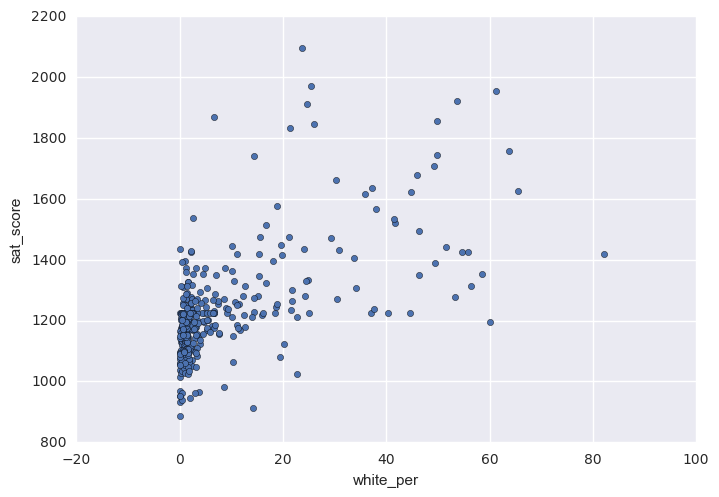

In [177]:
#Keep in mind that you can't judge a strong correlation between two variables with just by looking at the R value.  
#Plotting a scatterplot can help make a better judgement. 
import matplotlib.pyplot as plt
combined.plot.scatter(x='white_per', y='sat_score')
plt.show()

As can be seen by the scatterplot above the high R value can be misleading. There does not appear to be an apparent correlation between the percentage of white students and sat scores. 

In [178]:
#Sample out the columns that are strongly negatively correlated with sat scores 

neg_corr=correlations<(-0.3)
strong_neg_corr_index=np.where(neg_corr)
strong_neg_corr=[]
for s in strong_neg_corr_index:
    strong_neg_corr.append(correlations[s])

print(strong_neg_corr)



[frl_percent    -0.722722
ell_percent    -0.400259
sped_percent   -0.446034
hispanic_per   -0.400102
Name: sat_score, dtype: float64]


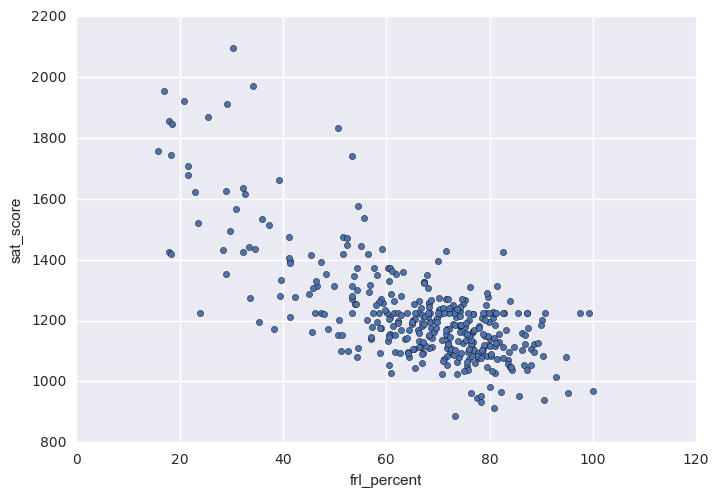

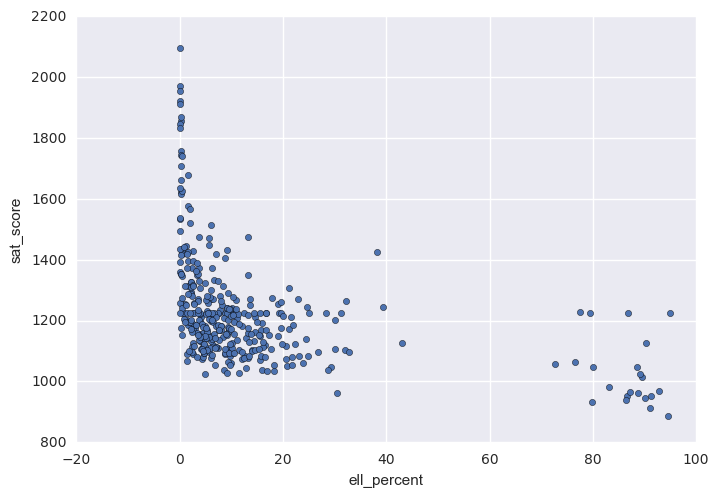

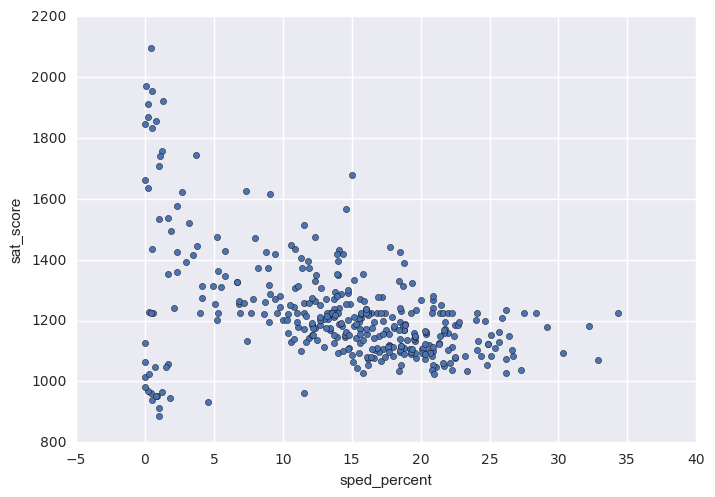

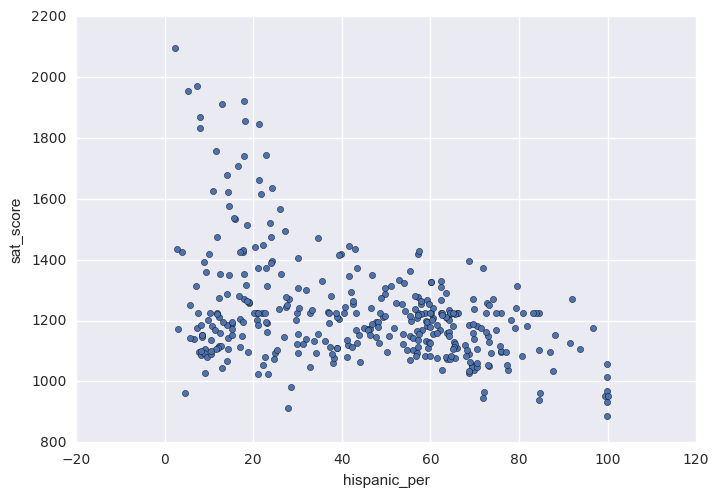

In [179]:
#Plot scatterplots to see which of the above are strongly negatively correlated. 

combined.plot.scatter(x='frl_percent', y='sat_score')
plt.show()

combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

combined.plot.scatter(x='sped_percent', y='sat_score')
plt.show()

combined.plot.scatter(x='hispanic_per', y='sat_score')
plt.show()

The higher the frl_percent (number of students enrolled in Free-Reduced Lunch plan) the lower the SAT scores. 
The higher the sped_percent (special education) the lower the SAT scores. There are however, some schools with low sped_percent but also low SAT scores 
The ell_percent (number of english language learners) is actually not as strongly negatively correlated with the SAT scores as the R value suggests. There is a small group of schools however that have a high percentage of english language learners and low SAT scores.
The hispanic_per (the percent of hispanic population) is also not as strongly negatively correlated with the SAT scores as the R value suggests. There is a small group of schools with low hispanic_per but also low SAT scores. It might be interesting to compare the schools with low hispanic_per and high sat scores and high hispanic_per and low sat scores. 

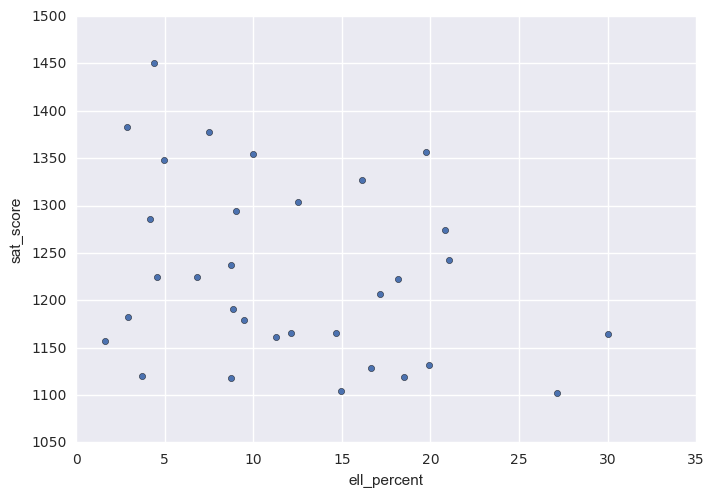

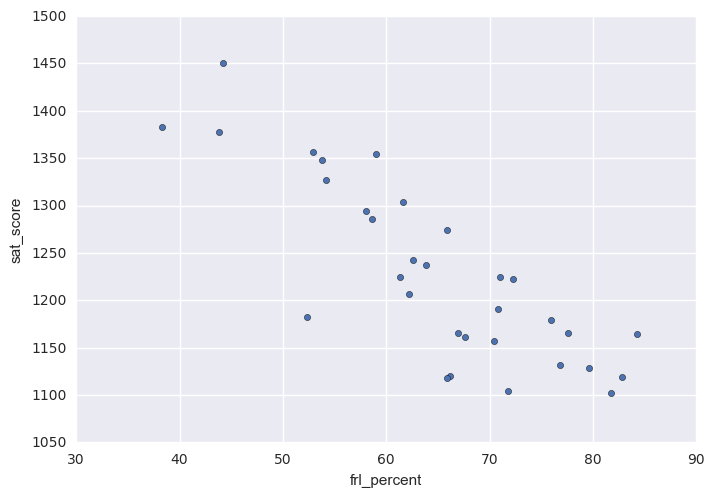

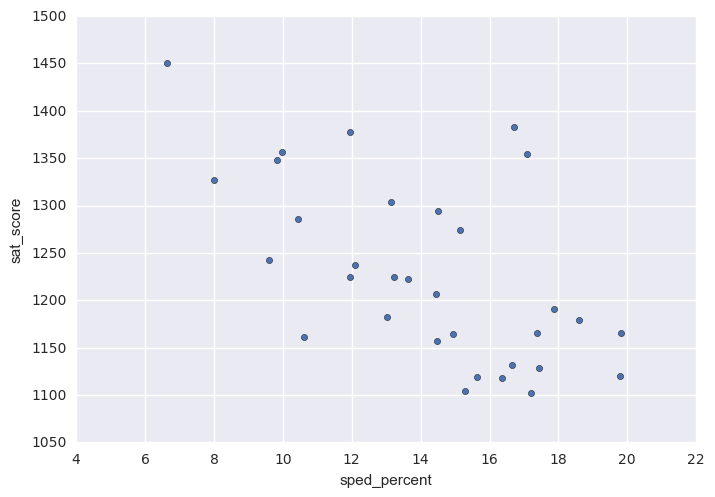

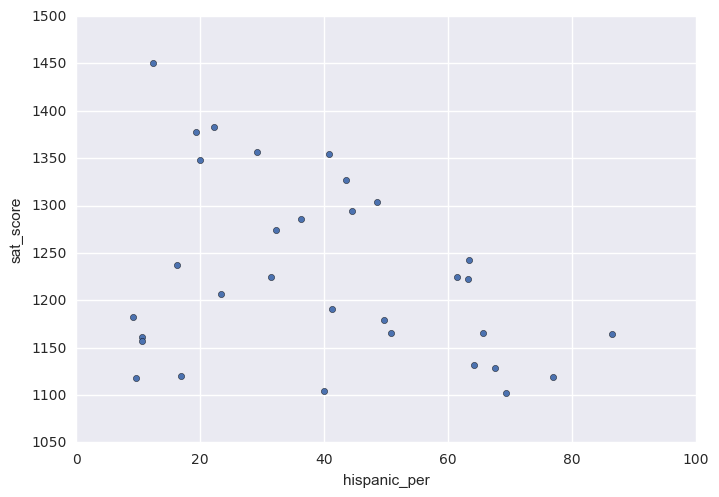

In [180]:
#Group the combined data frame by the districts. 
districts=combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)


districts.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

districts.plot.scatter(x='frl_percent', y='sat_score')
plt.show()

districts.plot.scatter(x='sped_percent', y='sat_score')
plt.show()

districts.plot.scatter(x='hispanic_per', y='sat_score')
plt.show()









In [181]:
#Sample the districts into what may be interesting sub categories to explore. 
frl_high=districts[districts["frl_percent"]>=60]
frl_high=frl_high[frl_high["sat_score"]<=1200]

sped_high_lowsat=districts[districts['sped_percent']<=20]
sped_high_lowsat=sped_high_lowsat[sped_high_lowsat['sat_score']<=1200]

sped_high_highsat=districts[districts['sped_percent']<=20]
sped_high_highsat=sped_high_highsat[sped_high_highsat['sat_score']>=1200]

ell_per_high=districts[districts["ell_percent"]>=80]
ell_per_high=ell_per_high[ell_per_high["sat_score"]<=1200]

hispanic_per_highsat=districts[districts["hispanic_per"]<=20]
hispanic_per_highsat=hispanic_per_highsat[hispanic_per_highsat["sat_score"]>=1400]

hispanic_per_lowsat=districts[districts["hispanic_per"]<=20]
hispanic_per_lowsat=hispanic_per_lowsat[hispanic_per_lowsat["sat_score"]<=1400]

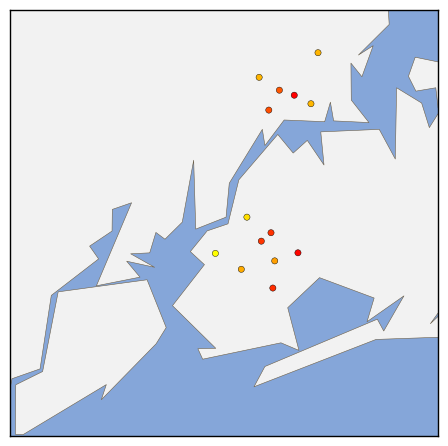

In [182]:
#Map the school districts with high frl_percent and low sat score to see if they are concentrated in a specific area 
from mpl_toolkits.basemap import Basemap

longitudes=frl_high["longi"].tolist()
latitudes=frl_high["lat"].tolist()

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=frl_high['sat_score'], cmap=plt.cm.autumn)

plt.show()


It looks like there is a cluster of schools with a high percent of free/reduced lunch located within what looks like Brooklyn and Manhattan. It might be interesting to look at income data within neighborhoods across NYC to see if the clusters fall in low income regions. 

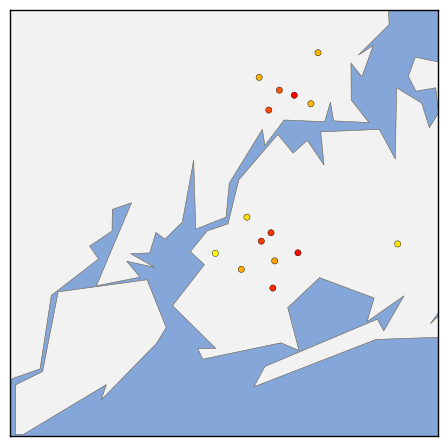

In [183]:
#Map the location of shcool districts with high sped_percent and low sat scores 
longitudes=sped_high_lowsat["longi"].tolist()
latitudes=sped_high_lowsat["lat"].tolist()

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=sped_high_lowsat['sat_score'], cmap=plt.cm.autumn)

plt.show()

In [184]:
print(frl_high.index)


Int64Index([5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 22, 31], dtype='int64')


In [185]:
print(sped_high_lowsat.index)

Int64Index([5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 22, 28, 31], dtype='int64')


It appears that the schools with high frl_percent and low sat scores are the same schools as those with high sped_percent and low sat scores with the exception of one school. Why is it that districts with a high FRL percent have lower SAT scores? We can compare school districts with a high frl_percent and low sat scores and a low frl_percent and high sat scores to see what the differences might be. 

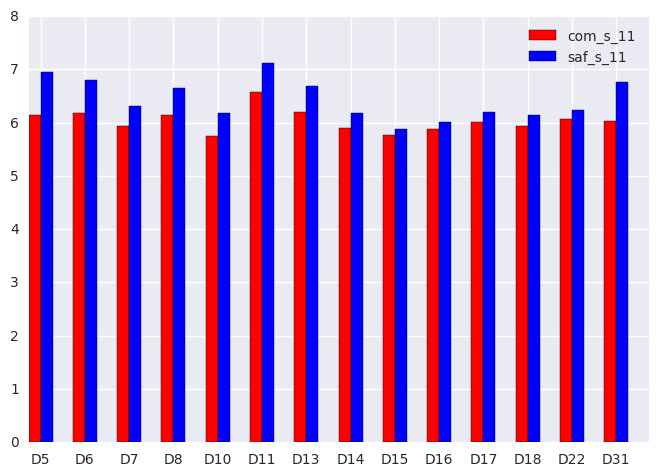

In [186]:
#Communication and Saftey Based on Student Responses in School Districts with High Percentage of Students 
#enrolled in the FRL program and SAT Scores < 1200

import numpy as np
import matplotlib.pyplot as plt

N = len(frl_high.index)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

ind_str=frl_high.index.astype(str)
dist_str = ["D" + i for i in ind_str]


fig = plt.figure()
ax = fig.add_subplot(111)

yvals = frl_high['com_s_11']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = frl_high['saf_s_11']
rects2 = ax.bar(ind+width, zvals, width, color='b')

ax.set_xticks(ind+width)
ax.set_xticklabels(dist_str)
ax.legend((rects1[0], rects2[0]), ('com_s_11', 'saf_s_11'))

plt.show()


In all districts the communication score based on student responses is less than the safety score based on student responses. 

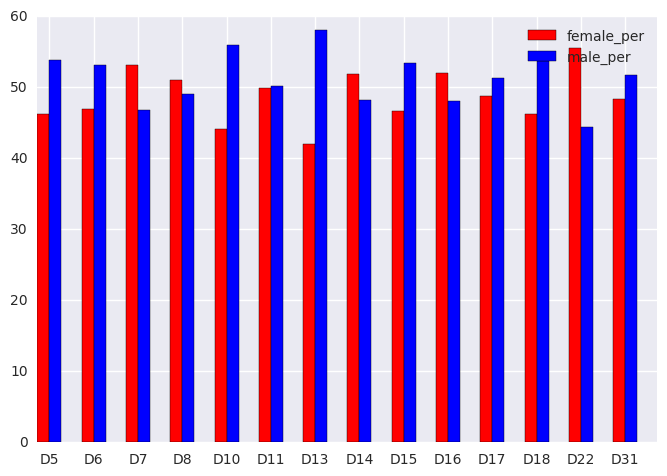

In [187]:
#Perecent of Males and Females in School Districts with High Percentage of Students enrolled in FRL 
#program and SAT Scores < 1200

import numpy as np
import matplotlib.pyplot as plt

N = 14
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

ind_str=frl_high.index.astype(str)
dist_str = ["D" + i for i in ind_str]


fig = plt.figure()
ax = fig.add_subplot(111)

yvals = frl_high['female_per']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = frl_high['male_per']
rects2 = ax.bar(ind+width, zvals, width, color='b')


ax.set_xticks(ind+width)
ax.set_xticklabels(dist_str)
ax.legend( (rects1[0], rects2[0]), ('female_per', 'male_per'))



plt.show()

There are more schools with a higher percentage of males than females.  

In [188]:
frl_low=districts[districts['frl_percent']<60]
frl_low=districts[districts['sat_score']>=1200]



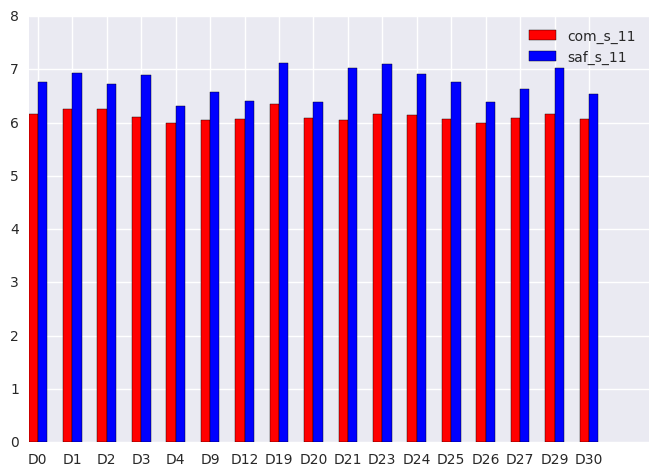

In [189]:
#Communication and Saftey Based on Student Responses in School Districts with Low Percentage of Students 
#enrolled in FRL program and SAT Scores > 1200

import numpy as np
import matplotlib.pyplot as plt

N = len(frl_low.index)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

ind_str=frl_low.index.astype(str)
dist_str = ["D" + i for i in ind_str]


fig = plt.figure()
ax = fig.add_subplot(111)

yvals = frl_low['com_s_11']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = frl_low['saf_s_11']
rects2 = ax.bar(ind+width, zvals, width, color='b')


ax.set_xticks(ind+width)
ax.set_xticklabels(dist_str)
ax.legend((rects1[0], rects2[0]), ('com_s_11', 'saf_s_11'))

plt.show()


The communication and saftey scores don't really seem to differ in the districts with high frl_percent and low sat scores and districts with low frl_percent and high sat scores. 

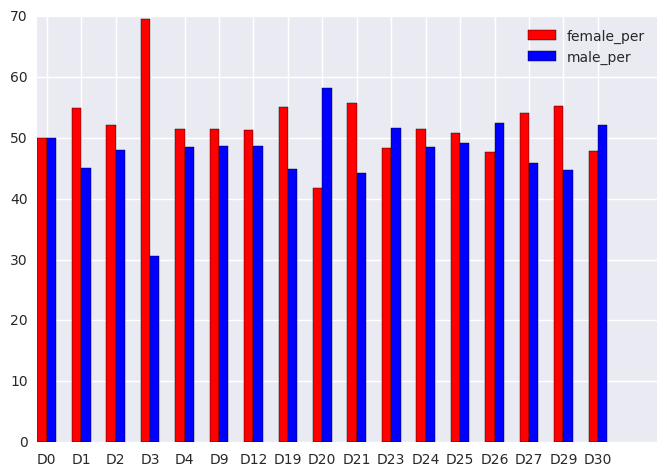

In [190]:
#Perecent of Males and Females in School Districts with Low Percentage of Students enrolled in the FRL 
#program and SAT Scores > 1200

import numpy as np
import matplotlib.pyplot as plt

N = len(frl_low.index)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

ind_str=frl_low.index.astype(str)
dist_str = ["D" + i for i in ind_str]


fig = plt.figure()
ax = fig.add_subplot(111)

yvals = frl_low['female_per']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = frl_low['male_per']
rects2 = ax.bar(ind+width, zvals, width, color='b')


ax.set_xticks(ind+width)
ax.set_xticklabels(dist_str)
ax.legend( (rects1[0], rects2[0]), ('female_per', 'male_per'))



plt.show()

There are more districts with a higher percentage of females than males. It may be that the higher SAT scores in school districts with a lower frl_percent are due to the higher percentage of females. However, we can't say that low frl_percent in these districts is due to a greater percentage in females. 

In [191]:
print(np.median(frl_low['AVERAGE CLASS SIZE']))
print(np.median(frl_high['AVERAGE CLASS SIZE']))

24.4470920015
23.0782926994


There also does not seem to be too much of a difference between the median average class size in the two district groups. 

There is a still a lot more that we can do with this data. We can perhaps combine property values dataset and find out the cheapest place where schools are good.